# Bank Customer Churn using ANN

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import tensorflow as tf

In [2]:
data = pd.read_csv('Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
data.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data['Gender'] = data['Gender'].map({'Female':1,'Male':0})
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,1,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0
2,502,France,1,42,8,159660.80,3,1,0,113931.57,1
3,699,France,1,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0


In [5]:
data.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [6]:
data = pd.get_dummies(data,drop_first=True)
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,1


C:\Users\HP\anaconda3\envs\py3_TensorFLow2.0\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


0    7963
1    2037
Name: Exited, dtype: int64


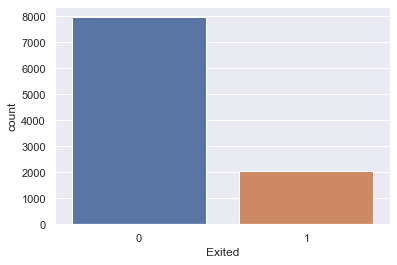

In [7]:
# Dependent variable is 'Exited'
sns.countplot(data.Exited);
print(data.Exited.value_counts())

In [8]:
# We need to resample to deal with imbalance
minority = data[data.Exited==1]
majority = data[data.Exited==0]

from sklearn.utils import resample

minority_upsampled = resample(minority,replace=True,n_samples=7963,random_state=0)
data_upsampled = pd.concat([majority,minority_upsampled])

print(data_upsampled['Exited'].value_counts())

1    7963
0    7963
Name: Exited, dtype: int64


In [9]:
len(data_upsampled)

15926

## Creating Features and Target

In [10]:
X = data_upsampled.drop('Exited', axis=1)
y = data_upsampled.Exited

In [11]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [12]:
#Scaling features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
y_test = y_test.to_numpy()

### Creating Neural Network

In [14]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=8,activation='tanh')) #First Hidden layer
ann.add(tf.keras.layers.Dense(units=8,activation='tanh')) #Second Hidden Layer
ann.add(tf.keras.layers.Dense(units=8,activation='tanh')) #Third Hidden Layer
ann.add(tf.keras.layers.Dense(units=8,activation='tanh')) #Fourth Hidden Layer
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid')) #Final Layer (Output Layer)

### Training the ANN

In [15]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [16]:
ann.fit(X_train_scaled, y_train.to_numpy(), batch_size = 30, epochs = 100)

Train on 12740 samples
Epoch 1/100
12740/12740 [==============================] - 3s 228us/sample - loss: 0.6095 - accuracy: 0.6654
Epoch 2/100
12740/12740 [==============================] - 1s 100us/sample - loss: 0.5691 - accuracy: 0.7110
Epoch 3/100
12740/12740 [==============================] - 1s 103us/sample - loss: 0.5624 - accuracy: 0.7149
Epoch 4/100
12740/12740 [==============================] - 2s 171us/sample - loss: 0.5550 - accuracy: 0.7212
Epoch 5/100
12740/12740 [==============================] - 2s 126us/sample - loss: 0.5413 - accuracy: 0.7265
Epoch 6/100
12740/12740 [==============================] - 1s 109us/sample - loss: 0.5157 - accuracy: 0.7453
Epoch 7/100
12740/12740 [==============================] - 1s 107us/sample - loss: 0.4913 - accuracy: 0.7602
Epoch 8/100
12740/12740 [==============================] - 1s 107us/sample - loss: 0.4764 - accuracy: 0.7684
Epoch 9/100
12740/12740 [==============================] - 1s 111us/sample - loss: 0.4654 - accuracy: 0.7

12740/12740 [==============================] - 1s 79us/sample - loss: 0.4233 - accuracy: 0.8039
Epoch 69/100
12740/12740 [==============================] - 1s 80us/sample - loss: 0.4237 - accuracy: 0.8016
Epoch 70/100
12740/12740 [==============================] - 1s 61us/sample - loss: 0.4230 - accuracy: 0.8038
Epoch 71/100
12740/12740 [==============================] - 1s 70us/sample - loss: 0.4236 - accuracy: 0.8018
Epoch 72/100
12740/12740 [==============================] - 1s 64us/sample - loss: 0.4224 - accuracy: 0.8042
Epoch 73/100
12740/12740 [==============================] - 1s 67us/sample - loss: 0.4233 - accuracy: 0.8036
Epoch 74/100
12740/12740 [==============================] - 1s 66us/sample - loss: 0.4222 - accuracy: 0.8032
Epoch 75/100
12740/12740 [==============================] - 1s 52us/sample - loss: 0.4227 - accuracy: 0.8036
Epoch 76/100
12740/12740 [==============================] - 1s 51us/sample - loss: 0.4221 - accuracy: 0.8035
Epoch 77/100
12740/12740 [======

## Predicting Test Results and Confusion Matrix

In [17]:
y_pred = ann.predict(X_test_scaled)

y_pred = (y_pred>0.5)

#Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy: ',accuracy_score(y_test, y_pred))

[[1281  297]
 [ 367 1241]]
Accuracy:  0.7915881983678594


Thus, we get an accuracy of 79.15% using Artificial Neural Network.